## Bispectrum Tutorial

This tutorial is intended to demonstrate bispectrum Analysis on Lightcurve data.<br>

The Bispectrum is an example of a Higher Order Spectrum (HOS) and contains more information that simple Powerspectrum or non-ploy spectra. <br> For detailed information on Bispectra visit : https://arxiv.org/pdf/1308.3150

In Stingray, Bispectrum can be created from a Lightcurve(For more information on Lightcurve, visit Lightcurve Notebook).<br>

First we import relevant classes.

In [1]:
from stingray import lightcurve
import numpy as np
from stingray.bispectrum import Bispectrum

import matplotlib.pyplot as plt
%matplotlib inline

Lightcurve Object can be created from an array of time stamps and an array of counts. Creating a simple lightcurve to demonstrate Bispectrum.

In [2]:
times = np.arange(1,11)
counts = np.array([2, 1, 3, 4, 2, 5, 1, 0, 2, 3])
lc = lightcurve.Lightcurve(times,counts)

lc.counts

array([2, 1, 3, 4, 2, 5, 1, 0, 2, 3])

<Axes: xlabel='times', ylabel='counts'>

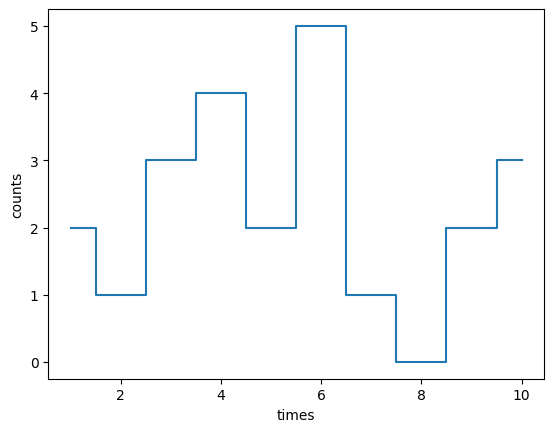

In [3]:
lc.plot(labels=['times','counts'])

A `Bispectrum` Object takes 4 parameter.<br>

1. `lc` : The light curve (lc).
2. `maxlag` : Maximum lag on both positive and negative sides of 3rd order cumulant (Similar to lags in correlation).
3. `window` : Specifies the type of window to apply as as string
4. `scale` : 'biased' or 'unbiased' for normalization

Arguments 2 and 3 are optional. If `maxlag` is not specified, it is set to no. of observations in lightcurve divided by 2. i.e `lc.n/2` .

In [4]:
bs = Bispectrum(lc)

Different attribute values can be observed by calling relevant properties. Most common are:<br>
1. self.freq - Frequencies against which Bispectrum is calculated.
2. self.lags - Time lags in lightcurve against which 3rd order cumulant is calculated.
3. self.cum3 - 3rd Order cumulant function
4. self.bispec_mag - Magnitude of Bispectrum
5. self.bispecphase - Phase of Bispectrum

In [5]:
bs.freq

array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5])

In [6]:
bs.lags

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [7]:
bs.cum3

array([[-0.3885, -0.0915,  0.1685, -0.5085,  0.8135, -0.0675, -0.2708,
         0.0229,  0.1426, -0.0567,  0.    ],
       [-0.0915,  0.2328, -0.5162, -2.0652,  0.3058,  0.1968,  0.8135,
         0.5492,  0.0209, -0.2484,  0.0063],
       [ 0.1685, -0.5162, -0.3999,  0.9821, -0.4989,  0.5011,  0.3058,
        -0.5085, -0.2348,  0.2379,  0.0426],
       [-0.5085, -2.0652,  0.9821, -0.3096,  0.5704,  2.1084, -0.4989,
        -2.0652,  0.1685,  0.8632,  0.0999],
       [ 0.8135,  0.3058, -0.4989,  0.5704, -1.3613, -0.3823,  0.5704,
         0.9821, -0.5162, -0.0915,  0.0872],
       [-0.0675,  0.1968,  0.5011,  2.1084, -0.3823,  0.864 , -1.3613,
        -0.3096, -0.3999,  0.2328, -0.3885],
       [-0.2708,  0.8135,  0.3058, -0.4989,  0.5704, -1.3613, -0.3823,
         0.5704,  0.9821, -0.5162, -0.0915],
       [ 0.0229,  0.5492, -0.5085, -2.0652,  0.9821, -0.3096,  0.5704,
         2.1084, -0.4989, -2.0652,  0.1685],
       [ 0.1426,  0.0209, -0.2348,  0.1685, -0.5162, -0.3999,  0.9821,
 

In [8]:
bs.bispec_mag

array([[ 6.1870122 ,  9.78649295,  6.29941723,  8.10990858,  3.90975859,
         1.49707597, 10.53408125,  8.44275685,  7.73419771,  7.91909148,
         3.40576093],
       [ 9.78649295, 12.99063169, 11.9523207 , 12.31681   ,  7.34404789,
         1.93438197,  5.05536311, 15.92827099,  6.61153784,  3.09535492,
         7.91909148],
       [ 6.29941723, 11.9523207 ,  4.84009298,  8.98535468,  5.6746004 ,
         1.71227576,  9.35566037, 12.00797853,  1.60576409,  6.61153784,
         7.73419771],
       [ 8.10990858, 12.31681   ,  8.98535468, 18.69373893,  9.83780286,
         2.72630968,  7.87985137,  5.32007463, 12.00797853, 15.92827099,
         8.44275685],
       [ 3.90975859,  7.34404789,  5.6746004 ,  9.83780286,  5.93123174,
         1.60598497,  0.51743271,  7.87985137,  9.35566037,  5.05536311,
        10.53408125],
       [ 1.49707597,  1.93438197,  1.71227576,  2.72630968,  1.60598497,
         1.262     ,  1.60598497,  2.72630968,  1.71227576,  1.93438197,
         1.497

In [9]:
bs.bispec_phase

array([[-7.65814471e-01, -8.39758950e-01,  7.49083269e-01,
        -9.35797260e-01, -1.22623935e+00, -3.13514588e+00,
         4.35308043e-01,  6.65460441e-01,  6.17269495e-01,
         4.39881603e-01, -3.14159265e+00],
       [-8.39758950e-01,  1.84719564e+00,  1.70902436e+00,
        -6.50042861e-01, -5.76818268e-01, -9.16177187e-02,
         1.76512372e+00,  2.97853199e+00,  1.45401552e+00,
         2.86939121e-16, -4.39881603e-01],
       [ 7.49083269e-01,  1.70902436e+00,  1.64851065e+00,
        -5.51373516e-01, -1.32816666e+00,  2.45429375e-01,
         2.86246989e+00,  3.08272440e+00,  5.53118871e-16,
        -1.45401552e+00, -6.17269495e-01],
       [-9.35797260e-01, -6.50042861e-01, -5.51373516e-01,
        -2.97776986e+00, -2.96295975e+00, -4.83162811e-01,
         1.34000660e+00, -5.00845466e-16, -3.08272440e+00,
        -2.97853199e+00, -6.65460441e-01],
       [-1.22623935e+00, -5.76818268e-01, -1.32816666e+00,
        -2.96295975e+00, -1.30996608e+00, -1.24358981e-01,
  

## Plots

Bispectrum in stingray also provides functionality for contour plots of:<br>

1. 3rd Order Cumulant function
2. Magnitude Bispectrum
3. Phase Bispectrum

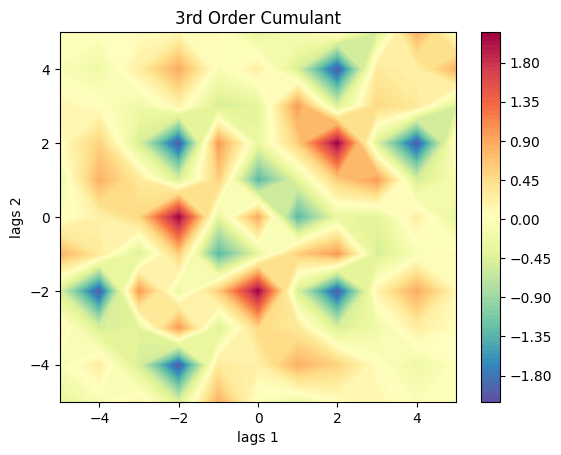

In [10]:
p = bs.plot_cum3()
p.show()

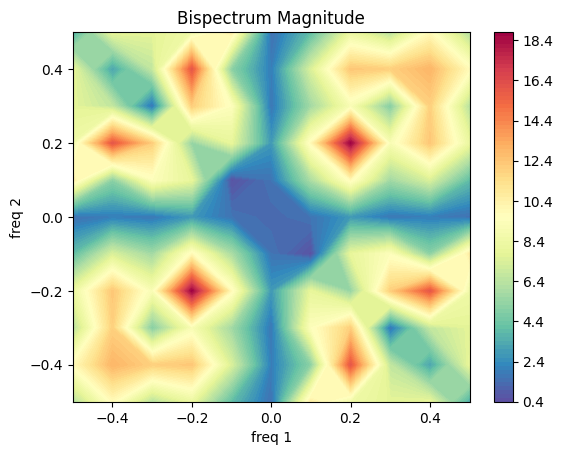

In [11]:
p = bs.plot_mag()
p.show()

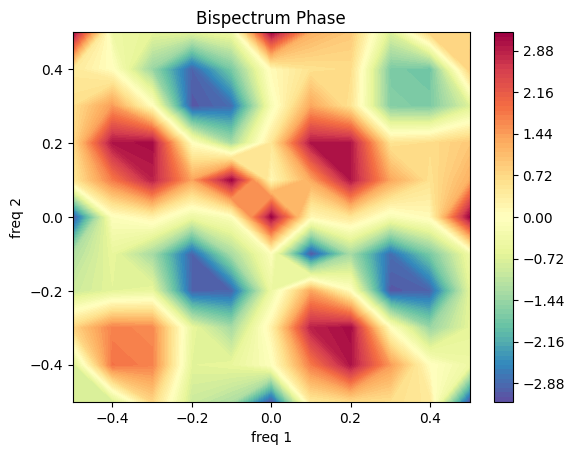

In [12]:
p = bs.plot_phase()
p.show()

## Another Example

Another example is demostrated here for a periodic lighturve with poisson noise.

In [13]:
dt = 0.0001  # seconds
freq = 1 #Hz
exposure = 50.  # seconds
times = np.arange(0, exposure, dt)  # seconds

signal = 300 * np.sin(2.*np.pi*freq*times/0.5) + 1000  # counts/s
noisy = np.random.poisson(signal*dt)  # counts

lc = lightcurve.Lightcurve(times,noisy)

In [14]:
lc.n

500000

<Axes: xlabel='Time (s)', ylabel='counts'>

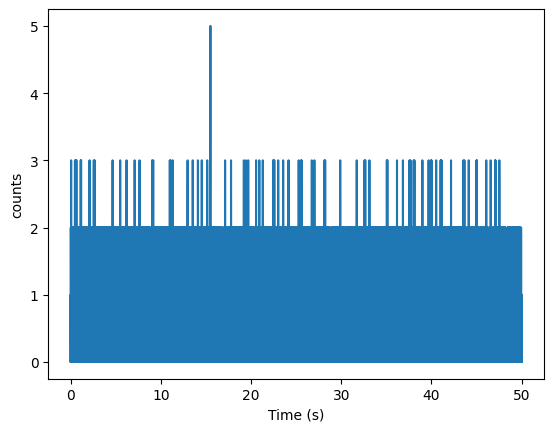

In [15]:
lc.plot()

In this example, 'unbiased' scaled Bispectrum is calculated.

In [16]:
bs = Bispectrum(lc, maxlag=25, scale='unbiased')

In [17]:
bs.freq[:5]

array([-5000.00000001, -4800.00000001, -4600.00000001, -4400.00000001,
       -4200.00000001])

In [18]:
bs.lags[-5:]

array([0.0021, 0.0022, 0.0023, 0.0024, 0.0025])

In [19]:
bs.n

500000

In [20]:
bs.cum3[0]

array([ 6.19008157e-04,  2.03485837e-05,  5.00392698e-05, -1.51808392e-05,
       -6.07868635e-05,  7.21620640e-05,  4.43978038e-05, -3.53553582e-05,
       -2.18694999e-05,  3.32471359e-05,  9.94282929e-05, -1.69675428e-05,
       -1.59927965e-05, -4.57945985e-05, -4.09488043e-05,  4.92460335e-05,
       -2.07356256e-05, -8.00521594e-05, -3.11554602e-05, -1.55852577e-05,
        5.20012432e-05, -3.65460881e-05,  3.68416996e-05, -1.19638303e-05,
        3.65690203e-05,  4.98822397e-04,  9.51638351e-05, -6.56008573e-05,
        3.52709230e-05, -1.78065343e-05,  1.57879989e-06,  9.77446663e-05,
       -3.64333429e-05,  1.75222159e-05, -4.80071760e-05, -1.78128398e-05,
       -4.14724922e-05, -5.34433904e-05, -6.22418994e-06,  3.37828112e-05,
       -4.40778315e-05,  6.69503353e-05, -6.57338472e-05,  6.21386010e-05,
       -3.37578303e-05,  8.94415135e-05, -6.70793009e-05, -6.16809635e-06,
       -2.80995835e-05,  7.99706117e-06, -4.77409894e-06])

In [21]:
bs.bispec_mag[1]

array([0.0972919 , 0.09672039, 0.10037666, 0.10385011, 0.09878416,
       0.10042741, 0.09574111, 0.09872639, 0.09925479, 0.09828774,
       0.10155117, 0.10224446, 0.10198138, 0.0994447 , 0.1008267 ,
       0.09760501, 0.09987234, 0.09627644, 0.10125568, 0.09784282,
       0.10226306, 0.10092295, 0.09644412, 0.09675466, 0.10170452,
       0.12059594, 0.1003821 , 0.09972157, 0.09499948, 0.10261727,
       0.10330336, 0.09473261, 0.10218567, 0.10095826, 0.10204961,
       0.10149677, 0.09772525, 0.09520186, 0.09685661, 0.10122301,
       0.10295465, 0.1021869 , 0.09978972, 0.09708938, 0.10185756,
       0.10242494, 0.09607346, 0.09886803, 0.10176006, 0.12032935,
       0.09962648])

In [22]:
bs.bispec_phase[1]

array([-2.40606614e-03, -1.66724685e-02, -4.11382661e-03, -3.43298861e-02,
       -3.33657963e-02,  1.50909110e-02, -6.31945723e-03, -2.28531430e-03,
       -3.22554327e-02, -1.67325935e-02,  1.44019808e-02, -1.59097135e-02,
        1.70808424e-02, -1.48040980e-02, -1.47216281e-02, -2.14638944e-02,
       -2.27430868e-02, -1.32656670e-03,  2.95300297e-03, -1.45433616e-02,
       -2.12694755e-02, -2.43475904e-02,  9.57116457e-03, -2.09898213e-02,
       -2.57010991e-02,  6.94787012e-03, -3.29981168e-04, -4.86813621e-03,
       -1.35288008e-02,  4.84254021e-02,  4.78208042e-03, -3.18145423e-03,
        1.09292510e-02, -1.13013633e-03, -1.21420985e-02, -1.80305832e-02,
       -9.19753594e-03,  2.40337533e-02, -3.09255031e-02, -8.85629943e-03,
       -4.07505654e-03,  7.43717301e-04,  9.67140409e-03,  4.91782259e-03,
        1.60845132e-03,  4.68049302e-02, -1.69883181e-02, -8.19066406e-03,
        3.27510120e-03,  7.20823106e-18, -3.10151891e-02])

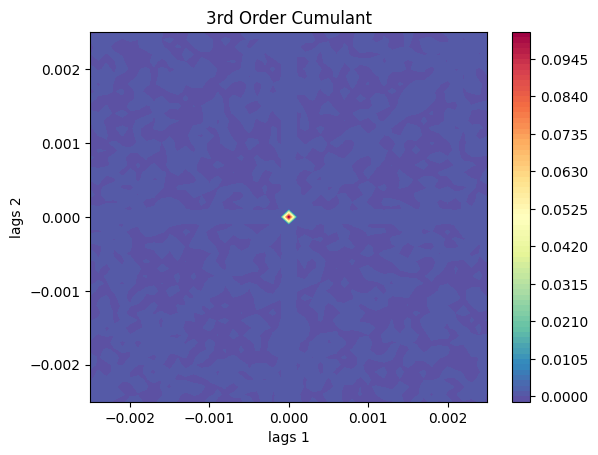

In [23]:
p = bs.plot_cum3()
p.show()

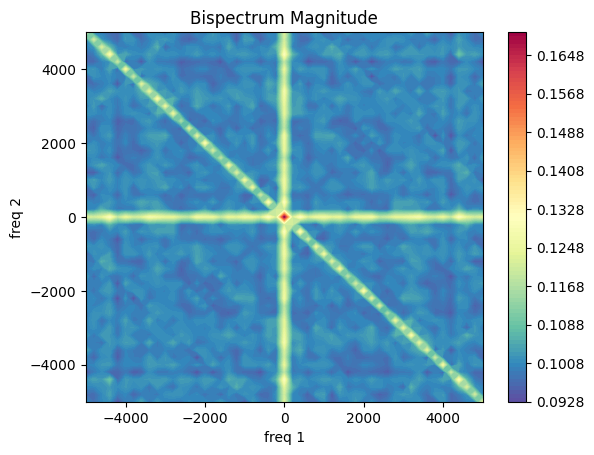

In [24]:
p = bs.plot_mag()
p.show()

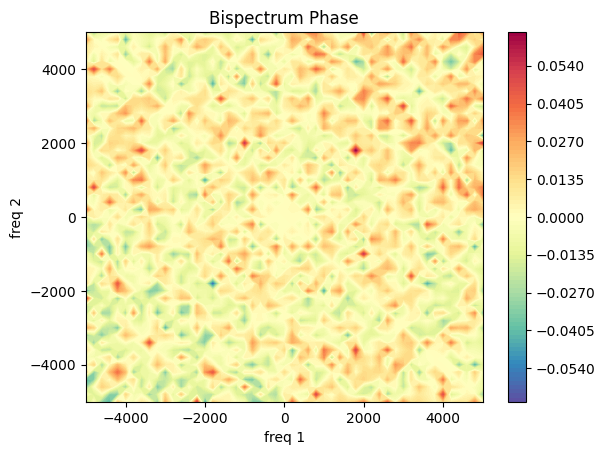

In [25]:
p = bs.plot_phase()
p.show()

## Window Functions for Bispectrum

`Bispectrum` in `Stingray` now supports 2D windows to apply before calculating `Bispectrum`. 

Windows currently available in `Stingray` include:
1. Uniform or Rectangular window
2. Parzen Window
3. Hamming Window
4. Hanning Window
5. Triangular Window
6. Blackmann's Window
7. Welch Window
8. Flat-top Window

Windows are available in `stingray.utils` package and can be used by calling `create_window` function.

Now, we demonstrate Bispectrum with windows applied. By default, now window is applied.

In [26]:
window = 'uniform'

bs = Bispectrum(lc,maxlag=25,window = window, scale ='unbiased')

In [27]:
bs.window_name

'uniform'

### Plot Window

Text(0.5, 1.0, '2D Uniform window')

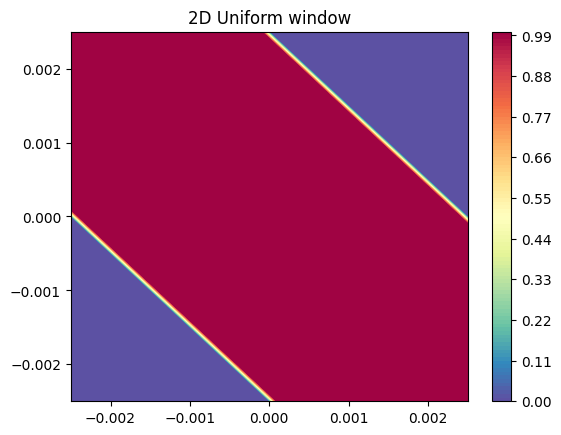

In [28]:
cont = plt.contourf(bs.lags, bs.lags, bs.window, 100, cmap=plt.cm.Spectral_r)
plt.colorbar(cont)
plt.title('2D Uniform window')

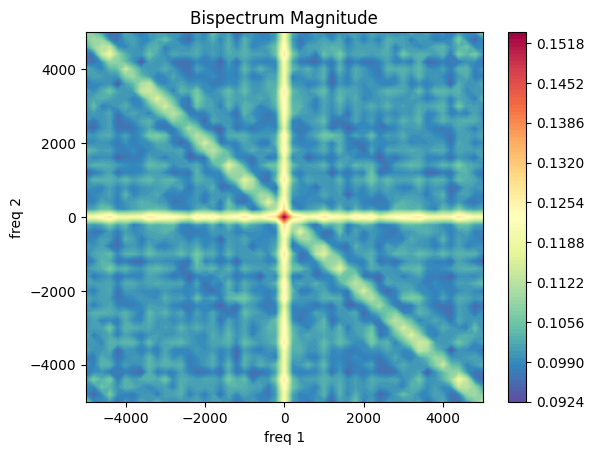

In [29]:
mag_plot = bs.plot_mag()
mag_plot.show()

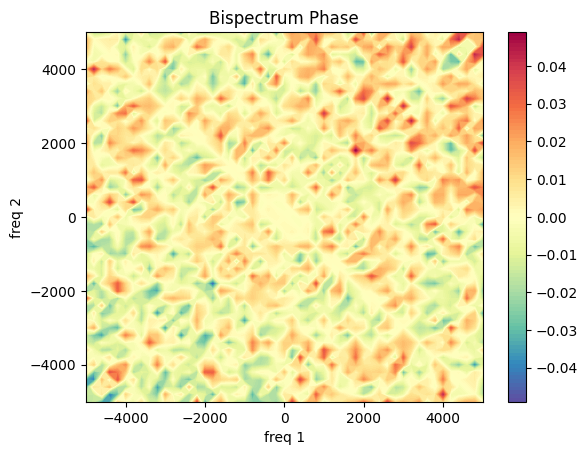

In [30]:
phase_plot = bs.plot_phase()
phase_plot.show()

Now, let us try some more window functions.

In [31]:
bs = Bispectrum(lc, maxlag=25,window = 'hamming',scale='biased')

In [32]:
bs.window_name

'hamming'

Text(0.5, 1.0, '2D Hamming window')

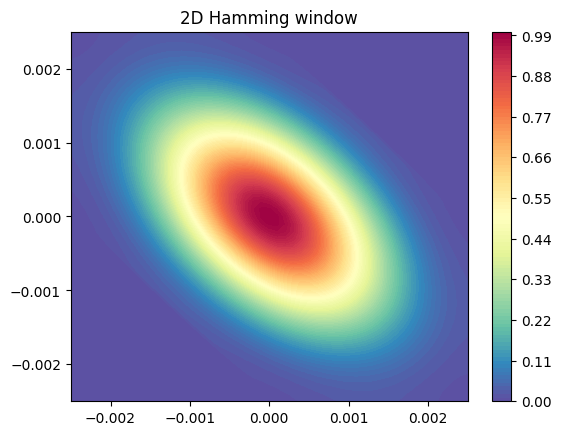

In [33]:
cont = plt.contourf(bs.lags, bs.lags, bs.window, 100, cmap=plt.cm.Spectral_r)
plt.colorbar(cont)
plt.title('2D Hamming window')

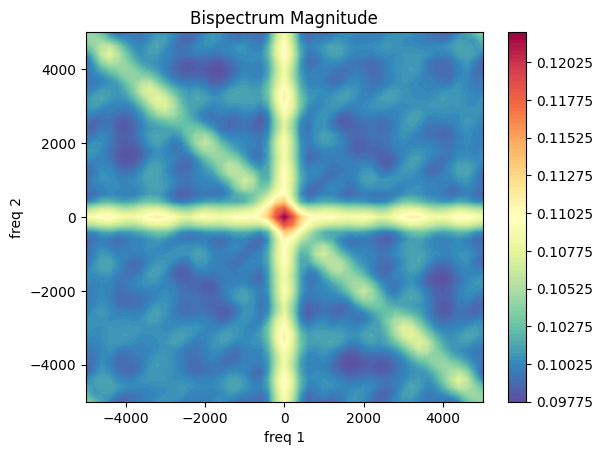

In [34]:
mag_plot = bs.plot_mag()
mag_plot.show()

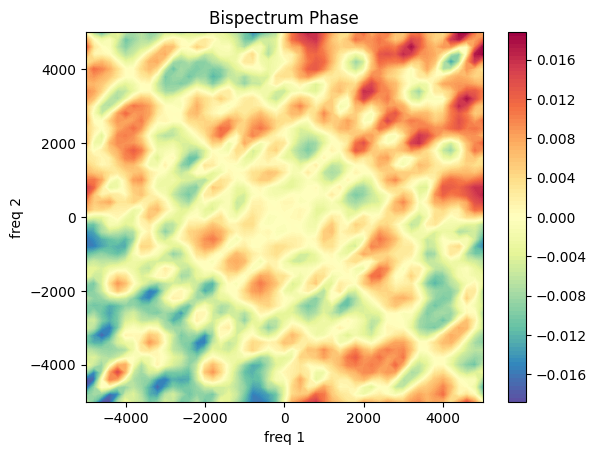

In [35]:
phase_plot = bs.plot_phase()
phase_plot.show()

### Another Window demonstrated

In [36]:
bs = Bispectrum(lc, maxlag = 25, window='triangular',scale='unbiased')

In [37]:
bs.window_name

'triangular'

Text(0.5, 1.0, '2D Flat Top window')

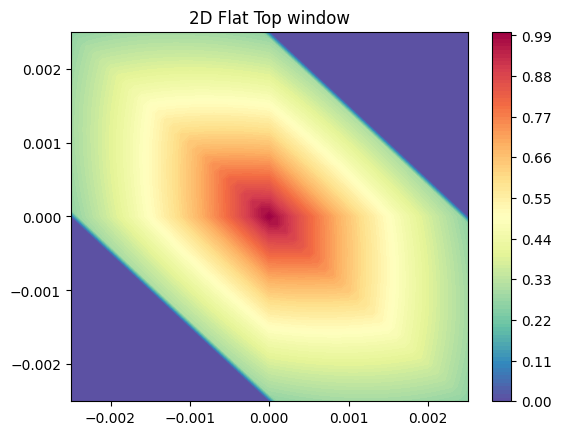

In [38]:
cont = plt.contourf(bs.lags, bs.lags, bs.window, 100, cmap=plt.cm.Spectral_r)
plt.colorbar(cont)
plt.title('2D Flat Top window')

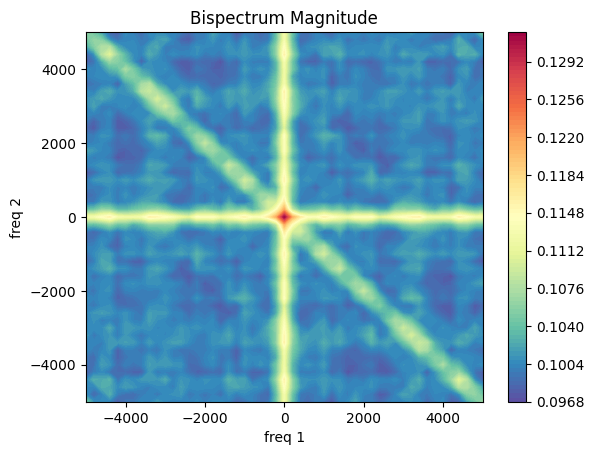

In [39]:
bs.plot_mag().show()

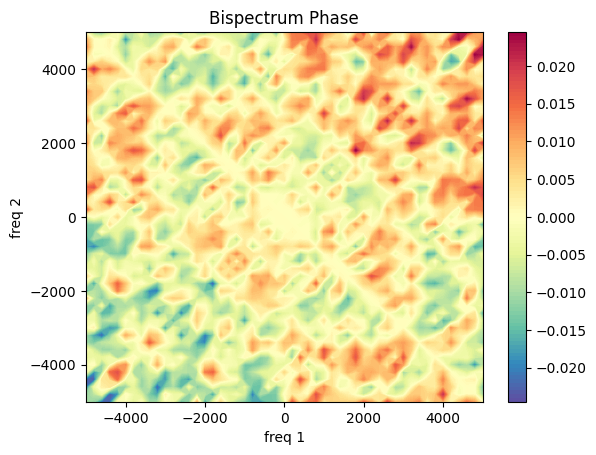

In [40]:
bs.plot_phase().show()